<a href="https://colab.research.google.com/github/ssanya942/MICCAI-Educational-Challenge-2024/blob/master/Implementing_Vision_Transformers_in_PyTorch_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Vision Transformers in PyTorch from Scratch on Any Dataset!
![picture](https://drive.google.com/uc?export=view&id=1-xAAGkV237xD3kDPeEcvkyf0ISXfOSFw)
## Table of Contents

- [Why this Tutorial?](#section-one)
- [Introduction to ViTs](#section-two)
- [ViT Architecture](#section-three)
- [Import Modules and Libraries](#section-four)
- [Data Processing](#section-five)
- [Creating ViT Network Components](#section-six)
- [Assembling ViT](#section-seven)
- [Training](#section-eight)
- [Results](#section-nine)





<a name="section-one"></a>
## Why this Tutorial?
Vision Transformers (ViTs) were introduced in 2020 to present a classification approach for images. Having being inspired by the Transformer architecture used prevalently in text classification, ViTs present a robust approach powered by multi-head self-attention to compete with CNNs for image recognition tasks. There have been numerous implementations of ViTs so far that capture the performance of the model perfectly. However, they are often implementable through external APIs such as [HuggingFace](https://huggingface.co/docs/transformers/en/model_doc/vit) or [Keras](https://keras.io/examples/vision/image_classification_with_vision_transformer/), providing easier computations at the expense of lower architectural transparency.

In fact, while these APIs are a Godsend for developers and engineers to facilitate model implementation and fine-tuning at the hit of a button, they are often not the best resort for students starting with Deep Learning. For learners, the best approach to get hands-on deep learning practice is through implementing SOTA models from scratch. In this repository, we have created the most lucid and understandable tutorial for students to implement ViTs from scratch on any dataset of their choice.

<a name="section-two"></a>
## Introduction to ViTs
Conventional research demonstrated replacing CNN layers or network components with attention mechanisms to aid image recpognition. The emergence of ViT proved that transformer models independently can also yield performances synonymous to those of CNNs. Let us discuss the ViT architecture that enables this.

<a name="section-three"></a>
## ViT Architecture

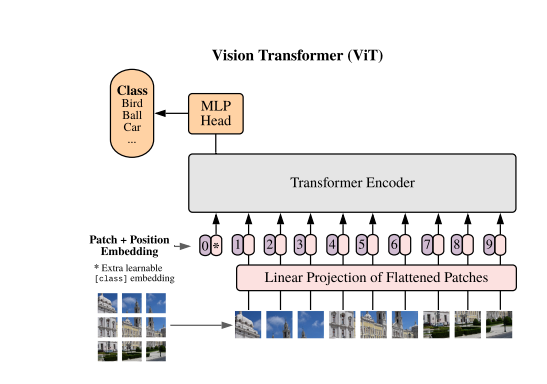

>Fig.1 Vision Transformer Architecture - [Source](https://arxiv.org/pdf/2010.11929)

Let us discuss the architecture step-by-step.
1. **Split the images into fixed-sized (16x16) patches**. The patch dimensions have been mentioned in the original ViT paper and are taken as standard.
2. **Flatten the image patches**. A standard Transformer receives inputs in the form of a 1D sequence of embeddings. Since image patches are 2D, we must reshape the patches into a sequence of flattened embeddings (patches, in our case).
3. **Add linear and positional embeddings to the patch sequence**. Linear embedding is a dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional space while preserving the local features of the data. Positional embeddings are added to the image patches to provide knowledge about the position of the input vectors. This ensures that upon 2D image reconstruction from the patches, the positional integrity of the patches is not lost and  a recognizable image is formed.   
4. **Feed the flattened patch sequence into a Transformer Encoder**. This transforms input tokens into contextualized representations.
5. **An extra "classification token" or an MLP head is added** to perform classification and recognition.


<a name="section-four"></a>
## Import Modules and Libraries
I have created [this ]( https://github.com/ssanya942/MICCAI-Educational-Challenge-2024.git) GitHub repository that can be cloned directly on your Colab/IPython environment to implement ViTs with PyTorch from scratch. It only contains the files you require for this code.


In [ ]:
#@title Clone, Install, Import
!git clone https://github.com/ssanya942/MICCAI-Educational-Challenge-2024.git
!pip install torchinfo

import matplotlib.pyplot as plt
import torch
import torchvision
torch.__version__
from torch import nn
from torchvision import transforms

Cloning into 'MICCAI-Educational-Challenge-2024'...
remote: Enumerating objects: 534, done.
remote: Counting objects: 100% (534/534), done.
remote: Compressing objects: 100% (534/534), done.
remote: Total 534 (delta 9), reused 508 (delta 0), pack-reused 0
Receiving objects: 100% (534/534), 9.43 MiB | 19.98 MiB/s, done.
Resolving deltas: 100% (9/9), done.


<a name="section-five"></a>
## Data Processing
Once the requirements have been installed, it is now time to process the dataset and create train/test dataloaders.

For this implementation, we have used the openly-accessible [NiH Malaria Cell Image Dataset]( https://ceb.nlm.nih.gov/repositories/malaria-datasets/).

The dataset contains 27,558 images divided into 2 categories:
1. **parasitized** (13,779 images), and
2. **uninfected** (13,779 images)

To speed up the training process, we have reduced the size of the dataset and structured it as:


```
malaria(500 images)
├── train (400)/
│ ├── uninfected(200)
│ └── infected(200)
└── test (100)/
├── uninfected(50)
└── infected(50)
```
 The dataset contains images of thin blood smear slides, obtained from 150 patients with *P. falciparum* malaria infection and 50 healthy individuals




In [ ]:
""" Specify the train and test image directories and proceed to create Dataloaders"""
train_dir = '/content/MICCAI-Educational-Challenge-2024/train'
test_dir = '/content/MICCAI-Educational-Challenge-2024/test'

import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into train and test data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [ ]:
""" Create Manual Data Transformation Pipeline"""

IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)), ##Resize to image size
    transforms.ToTensor(),  ## Convert np array to tensor
   transforms.RandomHorizontalFlip(p=0.5), ## Perform horizontal flipping
    transforms.RandomVerticalFlip(p=0.5),  ## Perform vertical flipping


])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
)



The code above defines a function ***create_dataloaders*** that sets up data loaders for training and testing datasets using PyTorch. It utilizes the **ImageFolder** class from **torchvision.datasets** to load image data from the **train_dir** and **test_dir** directories, applying a given set of manually-specified transformations to each image through **transforms.Compose()**. The function then creates **DataLoader objects** for the training and testing datasets for efficient data loading and batching during model training and evaluation. The ***batch_size*** parameter determines how many samples per batch to load, and ***num_workers*** specifies how many subprocesses to use for data loading, the default value for which is the number of available CPU cores. The function also retrieves the class names from the training dataset and returns the training data loader, test data loader, and class names.

Setting up the dataloader in the code below:

In [ ]:
BATCH_SIZE = 32

# Create data loaders
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, ## defined above
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x78c52ce5fcd0>,
 ['infected', 'uninfected'])

Now, we extract and visualize a single image from a batch of images obtained from a PyTorch data loader. First, we retrieve the next batch of images and their corresponding labels from ***train_dataloader*** using the **next** and **iter** functions. We display the shapes of the image and label for sanity checking.  The image is then plotted, but first, it is permuted to rearrange its dimensions from **[color_channels, height, width] to [height, width, color_channels]**, which is required by matplotlib for display.

This is shown in the code below.

torch.Size([3, 224, 224]) tensor(1)


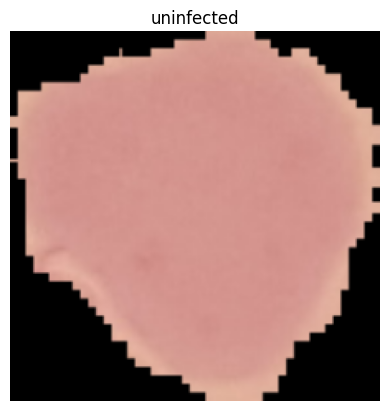

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
print(image.shape, label)

# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

<a name="section-six"></a>
## Creating ViT Network Components

We assume the ViT architecture to be a sum of multiple functional components stacked onto one another synchronously. We create multiple, independent network components that formulate the model architecture when amalgamated together. These network components include:
1. **A Patch Embedding Block**
2. **A Multi-head Self-attention Block**
3. **An MLP Head**, and
4. **A Transformer Encoder**

In [ ]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels (3).
        patch_size (int): Size of the patches generated from the input image (16x16).
        embedding_dim (int): Size of embedding to turn image into (768).
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)

        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1)

The ***PatchEmbedding class***, a subclass of **nn.Module** in PyTorch, converts a 2D input image into a 1D sequence of learnable embedding vectors. It takes parameters for:
1. the number of input channels (**in_channels**),
2. patch size (**patch_size**), and
3. embedding dimension (**embedding_dim**).

The class utilizes a convolutional layer (**self.patcher**) to divide the image into non-overlapping patches and project each patch into a vector of size **embedding_dim**.

 The **nn.Flatten** layer then reshapes the patch feature maps into one dimension. An assertion ensures the image resolution is divisible by the patch size, preventing runtime errors. In the **forward** method, the image is passed through the patcher and flatten layers, and the output dimensions are permuted to match the expected input format of transformers, yielding an output shape of (**batch_size**, **num_patches**, **embedding_di**m). This process allows the image data to be efficiently transformed for sequential processing in neural network architectures.

In [ ]:
# Let's test it on single image
patch_size =16

# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations (42). """
    # Set the seed for general torch operations (CPU)
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (GPU)
    torch.cuda.manual_seed(seed)



set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
print(f"Output patch embedding shape: {patch_embedded_image.shape}")
print(patch_embedded_image)
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])
tensor([[[-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033],
         [-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033],
         [-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033],
         ...,
         [-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033],
         [-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033],
         [-0.0188, -0.0114, -0.0311,  ...,  0.0105, -0.0033,  0.0033]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [ ]:
# 1. Create a new nn.Module class
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSA block")."""
    # 2. Initialize the class with hyperparameters from Table 1 in ViT-Paper
    def __init__(self,
                 embedding_dim:int=768, # Data from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # Defaults to 0 in ViT-Paper for MSABlocks
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create MSA layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) # if our batch dimension comes first

    # 5. Create a forward() method to pass the data throguh the layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings
                                             key=x, # key embeddings
                                             value=x, # value embeddings
                                             need_weights=False) # do we need the weights or just the layer outputs?
        return attn_output

The ***MultiheadSelfAttentionBlock*** class implements a multi-head self-attention mechanism, a core component of ViT. Instead of a single attention mechanism for capturing long-range dependencies and contextual features, multiple attention heads (e.g., 12 for ViT-Base) operate in parallel. Each head has its own set of learned Query-Key-Value (QKV) transformations, enabling the model to capture different types of relationships and patterns within the data.
It initializes with hyperparameters:
1. **embedding_dim (768)**,
2. **num_heads (12)**, and
3. **attn_dropout** for dropout rate (**defaulting to 0**).

The class consists of two main components:
1. **Layer Normalization (nn.LayerNorm)** is applied to the input to stabilize and speed up training.
2. **Multi-Head Attention (nn.MultiheadAttention)** is configured with the specified embedding dimension and number of heads.

In the **forward** method, the input tensor `x` is normalized, then passed through the multi-head attention layer as **query, key, and value**, producing the attention output. The **batch_first=True** parameter ensures that the batch dimension is the first dimension of the input tensor, adhering to the typical PyTorch conventions. As **need_weights=False** is specified, the attention weights are computed internally but not returned,. This class facilitates efficient attention-based transformations of input data for sequential modeling tasks.

If you don't have prior experience with self-attention mechanisms, please take a look at this explanation for QKV-pairs.
### Understanding Query-Key-Value in Self-Attention

All self-attention networks use a system of 3 weight matrices which are adjusted as model parameters during training. These matrices are $W_q$, $W_k$, and $W_v$.

These learned weight matrices are multiplied with the input embeddings ($x$) to yield QKV input sequences. This is calculated through a scaled dot-product multiplication.

1. Query sequence: $q(i) = x(i) W_q$ for $i$ in sequence $1 \ldots T$
2. Key sequence: $k(i) = x(i) W_k$ for $i$ in sequence $1 \ldots T$
3. Value sequence: $v(i) = x(i) W_v$ for $i$ in sequence $1 \ldots T$


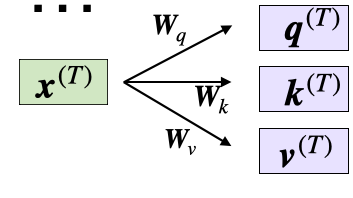

> Fig.2. QKV Dot Product Calculation-[Source](https://magazine.sebastianraschka.com/p/understanding-and-coding-self-attention)

In the case of MSA, multiple self-attention heads are placed in parallel.

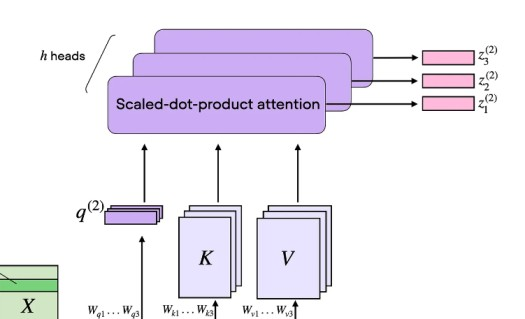
> Fig.3. Multi-head Self-Attention Mechanism-[Source](https://magazine.sebastianraschka.com/p/understanding-and-coding-self-attention)

Here, $z_i$ is a weighted context vector of the original input $x$ obtained through the scaled dot product multiplication.



In [ ]:
# 1. Create another nn.Module Class
class MLPBlock(nn.Module):
    """Creates a layer normalized multilayer perceptron block (MLP) ."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3 of the ViT-Paper
    def __init__(self,
                 embedding_dim:int=768, # Dimensions from Table 1 for ViT-Base Paper
                 mlp_size:int=3072, # Size of the hidden layer in the MLP block from Table 1 for ViT-Base Paper
                 dropout:float=0.1): # Dropout from Table 3 for ViT-Base Paper
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the MLP Layer
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # The MLP contains two GELU Layers
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # input of this layer is the output of the previous layer
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # Dropout after Dense Layer
        )

    # 5. Create a forward() method to pass the data throguh the layers
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

The above code defines a PyTorch module class called ***MLPBlock***, which is a Multi-layer Perceptron block of the ViT architecture. This block implements a layer-normalized MLP with parameters based on the ViT-Base configuration from the ViT paper.

For those who are unaware, MLP is one of the [simplest artificial neural network architectures](https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141) for classification tasks.

The class initializes with the hyperparameters
1. **embedding_dim**,
2. **mlp_size**, and
3. **dropout**, which default to values specified in the ViT paper.

The MLP block consists of a **LayerNorm** layer followed by a sequential model of two linear layers, followed by a **Gaussian Error Linear Unit (GELU)** activation function and a dropout for regularization. The **forward** method applies layer normalization and passes the input through the MLP layers, returning the output, which helps in enhancing the model's expressiveness and improving training stability.

In [ ]:
# 1. Create another nn.Module class
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Embedding size from Table 1 in ViT-Base Paper
                 num_heads:int=12, # No. of Heads from Table 1 in ViT-Base Paper
                 mlp_size:int=3072, # MLP size from Table 1 in ViT-Base Paper
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 in ViT-Base paper
                 attn_dropout:float=0): # Amount of dropout for attention layers (defaulting to 0)
        super().__init__()

        # 3. Create MSA block
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 4. Create MLP block
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    # 5. Create a forward() method
    def forward(self, x):

        # 6. Create residual connection for MSA block
        x =  self.msa_block(x) + x

        # 7. Create residual connection for MLP block
        x = self.mlp_block(x) + x

        return x


The code defines a ***TransformerEncoderBlock class*** inherited from the PyTorch **nn.Module** class. It can handle input sequences through self-attention and feedforward neural networks. This is the block that processes an input sequence of vectors and creates representations that contain contextual information, which are then passed through a classification head. The block is initialized with the hyperparameters
1. **embedding_dim**,
2. **num_heads**,
3. **mlp_size**,
4. mlp_dropout, and
5. attn_dropout, all sourced from the ViT-Base architecture specifications.


Within the block, a multi-head self-attention (MSA) mechanism is implemented using a ***MultiheadSelfAttentionBlock***, which facilitates learning contextual relationships in the input data. Additionally, an ***MLPBlock*** is utilized to apply a multi-layer perceptron for further processing of the attended features. A normalization layer is added before the MSA and MLP blocks. The **forward** method includes residual connections around both the MSA and MLP blocks, which help maintain gradient flow and improve model stability during training, helping in encoding complex input features.


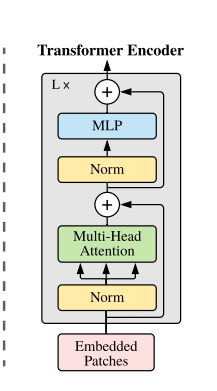

> Fig.5. Transformer Encoder

Let us display a quick model summary of our Transformer Encoder block.

In [ ]:
transformer_encoder_block = TransformerEncoderBlock()

from torchinfo import summary
# # Print an input and output summary of the Transformer Encoder
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=25,
       row_settings=["var_names"])

Layer (type (var_name))                            Input Shape               Output Shape              Param #                   Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]             [1, 197, 768]             --                        True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─MultiheadAttention (multihead_attn)         --                        [1, 197, 768]             2,362,368                 True
├─MLPBlock (mlp_block)                             [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─Sequential (mlp)                            [1, 19

<a name="section-seven"></a>
## Assembling ViT
Now that we are done creating individual model components for ViT, it is now time for us to assemble these components together to form the complete architecture.

In [ ]:
class ViT(nn.Module):
    """Creates a Vision Transformer architecture with ViT-Base hyperparameters by default."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3 in ViT-Base Paper
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000): # Default for ImageNet
        super().__init__() # don't forget the super().__init__()!

        # 3. Make the image size divisble by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 4. Calculate number of patches (height * width/patch^2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)

        # 6. Create learnable position embedding
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)

        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)

        # 9. Create Transformer Encoder blocks (stacked)
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

        # 10. Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )

    # 11. Create a forward() method
    def forward(self, x):

        # 12. Get batch size
        batch_size = x.shape[0]

        # 13. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding (equation 1)
        x = self.patch_embedding(x)

        # 15. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # 16. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # 17. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x

Finally, all the network components of ViT are put together and a **ViT** class is initialized with all the parameters described in the code above.

To summarize the code, the model divides an input image into non-overlapping patches, which are linearly embedded into a sequence of patch embeddings. A learnable class token and position embeddings are added to this sequence. The sequence is then passed through multiple transformer encoder blocks, each consisting of multi-head self-attention and a feed-forward neural network, followed by layer normalization. A dropout layer is applied to the embeddings to prevent overfitting. Finally, the class token's embedding is extracted and passed through a classifier head, which includes a layer normalization and a fully connected layer, to produce class logits.

Initialize the model as follows and start training.

In [ ]:
vit = ViT(num_classes=len(class_names))

I have trained the model for only 30 epochs using Google Colab's Tesla A100 GPU, but you can also train it with the free T4 GPU. The *engine.py* file is provided in my repository for direct import. It is originally from the [Pytorch deep learning repo](https://github.com/mrdbourke/pytorch-deep-learning/tree/main).

Set up the
1. **optimizer (Adam)**, and
2. **the loss function (Cross entropy loss)**

Now, train the model.

<a name="section-eight"></a>
## Training

In [ ]:
%cd /content/MICCAI-Educational-Challenge-2024

/content/MICCAI-Educational-Challenge-2024


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
 ## sanity checking the working directory


import engine
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=30,
                       device=device)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0426 | train_acc: 0.5120 | test_loss: 0.7778 | test_acc: 0.3906
Epoch: 2 | train_loss: 0.7353 | train_acc: 0.4760 | test_loss: 0.7765 | test_acc: 0.3906
Epoch: 3 | train_loss: 0.7141 | train_acc: 0.4808 | test_loss: 0.6705 | test_acc: 0.6094
Epoch: 4 | train_loss: 0.6980 | train_acc: 0.4976 | test_loss: 0.6808 | test_acc: 0.6094
Epoch: 5 | train_loss: 0.7026 | train_acc: 0.4760 | test_loss: 0.6722 | test_acc: 0.6094
Epoch: 6 | train_loss: 0.7356 | train_acc: 0.5072 | test_loss: 0.6696 | test_acc: 0.6094
Epoch: 7 | train_loss: 0.7376 | train_acc: 0.5000 | test_loss: 0.8440 | test_acc: 0.3906
Epoch: 8 | train_loss: 0.7301 | train_acc: 0.5072 | test_loss: 0.7926 | test_acc: 0.3906
Epoch: 9 | train_loss: 0.7561 | train_acc: 0.4591 | test_loss: 0.6804 | test_acc: 0.6094
Epoch: 10 | train_loss: 0.7349 | train_acc: 0.5457 | test_loss: 0.7295 | test_acc: 0.3906
Epoch: 11 | train_loss: 0.7569 | train_acc: 0.4736 | test_loss: 0.6726 | test_acc: 0.6094
Epoch: 12 | train_l

Congratulations! You have successfully trained your model! Now, you can plot the accuracy and loss curves of your model through *helper_functions.py*. You can also check the performance of your model on custom images present in your dataset and obtain a probability score through the *predictions.py* file. Both of these are already present in my repository, so you don't need to worry!

<a name="section-nine"></a>
## Results

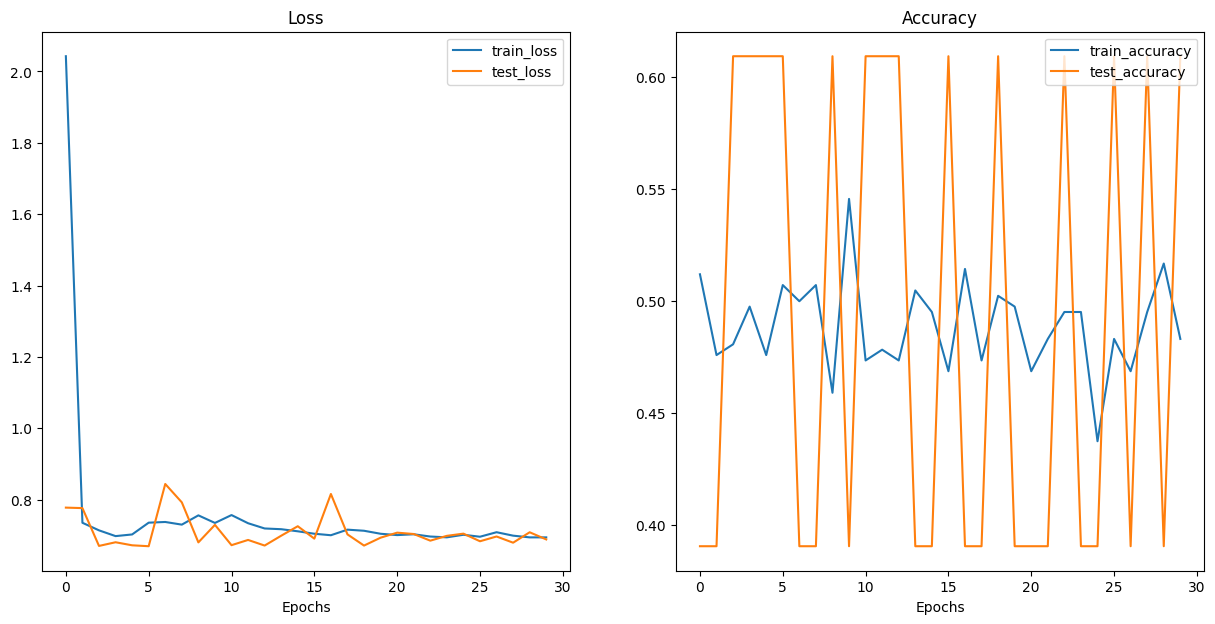

In [ ]:
from helper_functions import plot_loss_curves

# Plot our ViT model's loss curves
plot_loss_curves(results)

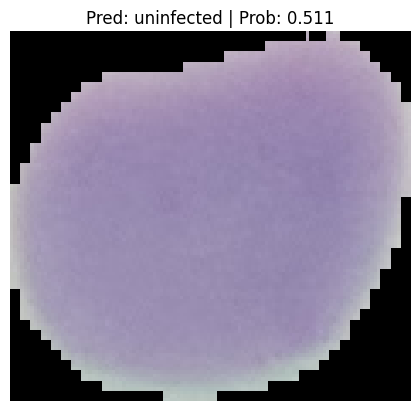

In [ ]:
import requests
import predictions
from predictions import pred_and_plot_image
 #Setup custom image path
custom_image_path = "/content/MICCAI-Educational-Challenge-2024/test/uninfected/C240ThinF_IMG_20151127_115328_cell_227.png"

# Predict on custom image
pred_and_plot_image(model=vit,
                    image_path=custom_image_path,
                    class_names=class_names)

You have now succesfully implemented Vision Transformers from scratch on your custom dataset! Through this explanation, we aim to simplify the complexities behind the implementations of state-of-the-art models. We intend to streamline the process of understanding hands-on deep learning by breaking down the ViT architecture into smaller network components, and then assembling the model through a bottom-up approach.  

There is a lot that students could experiment with in this implementation. Adding saliency heatmaps, increasing the number of classes, and model fine-tuning are just a few experiments to begin with. Let the sky be the limit!